# Analytical conditions 

> A set of functions for expressing analytical conditions which are used to analyse the evolutionary models

In [ ]:
#| default_exp conditions

In [ ]:
#| hide
#| export
from nbdev.showdoc import *
from fastcore.test import test_eq
from gh_pages_example.utils import *
from gh_pages_example.payoffs import *
import typing


import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import nptyping

/mnt/d/Paolo-Work/git/gh-pages-example/gh_pages_example/model_utils.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (ind not in allowed_inds) and (str(ind) not in allowed_inds):


## DSAIR models

### DSAIR when Always Safe is collectively prefferred against Always Unsafe

An equilibrium is collectively preferred if the sum of the payoffs to all players is greater than the alternative.

**$\Pi$(Always Safe, Always Safe) > $\Pi$(Always Unsafe, Always Unsafe)**

Using the payoffs defined in `gh_pages_example.payoffs` we can rewrite the corresponding equality in terms of $(1 - p)$.

\begin{equation}
p_{risk} = (1 - p) = 1 - \frac{\pi_{11} + \frac{B}{2 W}}{ \pi_{22} + \frac{s B}{2 W}}
\end{equation}

We will often use the boundary of this inequality in our analysis.

In [ ]:
#| export
def threshold_society_prefers_safety_dsair(models):
    """The threhsold value of AI risk for which society prefers firms to be
    Always Safe in the DSAIR model."""
    s, B, W = [models[k]
               for k in ['s', 'B', 'W']]
    collective_risk = models.get('collective_risk', 0)
    πAA, πAB, πBA, πBB = [models['payoffs_sr'][:, i, j]
                          for i in range(2) for j in range(2)]
    a = collective_risk
    b = (1 - collective_risk)
    c = ((πAA + B / (2 * W))
         / (πBB + s * B / (2 * W))) * -1
    # This gives us a quadratic in p if we move everything to r.h.s
    # in the form a p**2 + b p + c = 0
 
    # We can solve for p using the quadratic formula
    threshold_p = np.where(a==0,
                           -c / b,
                           (-b + (b**2 - 4*a*c)**0.5)/(2*a))
    threshold_p_alt = np.where(a==0,
                               -c / b,
                               (-b - (b**2 - 4*a*c)**0.5)/(2*a))
    p_risk = 1 - threshold_p
    p_risk_alt = 1 - threshold_p_alt
    return {**models,
            "threshold_society_prefers_safety": p_risk,
            "threshold_society_prefers_safety_alt": p_risk_alt}

### DSAIR risk dominance of Always Safe against Always Unsafe

An equilibrium is selected by evolution in 2-by-2 matrix games if it is risk dominant. Risk dominance requires that:

**$\Pi$(Always Safe, Always Safe) +  $\Pi$(Always Safe, Always Unsafe) > $\Pi$(Always Unsafe, Always Safe) + $\Pi$(Always Unsafe, Always Unsafe)**

Using the payoffs defined in `gh_pages_example.payoffs` we can rewrite the corresponding equality in terms of $(1 - p)$.

\begin{equation}
p_{risk} = (1 - p) = 1 - \frac{\pi_{11} + \pi_{12} + \frac{B}{2 W}}{\pi_{21} + \pi_{22} + \frac{3 s B}{2 W}}
\end{equation}

We will often use this boundary in our analysis.

In [ ]:
#| export
def threshold_risk_dominant_safety_dsair(models):
    """The threshold value of AI risk for which Always Safe is risk dominant
    against Always Unsafe in the DSAIR model."""
    s, B, W = [models[k]
               for k in ['s', 'B', 'W']]
    collective_risk = models.get('collective_risk', 0)
    πAA, πAB, πBA, πBB = [models['payoffs_sr'][:, i, j]
                          for i in range(2) for j in range(2)]
    a = collective_risk
    b = (1 - collective_risk)
    c = ((πAA + πAB + B / (2 * W))
         / (πBA + πBB + 3 * s * B / (2 * W))) * -1
     # This gives us a quadratic in p if we move everything to r.h.s
    # in the form a p**2 + b p + c = 0

    # We can solve for p using the quadratic formula
    threshold_p = np.where(a==0,
                           -c / b,
                           (-b + (b**2 - 4*a*c)**0.5)/(2*a))
    threshold_p_alt = np.where(a==0,
                               -c / b,
                               (-b - (b**2 - 4*a*c)**0.5)/(2*a))
    p_risk = 1 - threshold_p
    p_risk_alt = 1 - threshold_p_alt
    return {**models,
            "threshold_risk_dominant_safety": p_risk,
            "threshold_risk_dominant_safety_alt": p_risk_alt}

In [ ]:
#| export
def threshold_risk_dominant_safety_reg_market(models):
    """The threshold value of AI risk for which Always Safe is risk dominant
    against Always Unsafe in the Regulatory Market model when the detection risk
    is fixed."""
    s, B, W = [models[k]
               for k in ['s', 'B', 'W']]
    collective_risk = models.get('collective_risk', 0)
    πAA, πAB, πBA, πBB = [models['payoffs_sr'][:, i, j]
                          for i in range(2) for j in range(2)]
    a = collective_risk
    b = (1 - collective_risk)
    c = ((πAA + πAB + B / (2 * W))
         / (πBA + πBB + 3 * s * B / (2 * W))) * -1
     # This gives us a quadratic in p if we move everything to r.h.s
    # in the form a p**2 + b p + c = 0
    
    # We can solve for p using the quadratic formula
    threshold_p = np.where(a==0,
                           -c / b,
                           (-b + (b**2 - 4*a*c)**0.5)/(2*a))
    threshold_p_alt = np.where(a==0,
                               -c / b,
                               (-b - (b**2 - 4*a*c)**0.5)/(2*a))
    p_risk = 1 - threshold_p
    p_risk_alt = 1 - threshold_p_alt
    return {**models,
            "threshold_risk_dominant_safety": p_risk,
            "threshold_risk_dominant_safety_alt": p_risk_alt}

### DSAIR risk dominance of Punisher Safe against Always Unsafe

In [ ]:
#| export
def threshold_ps_r_d_au(models):
    """The analytic threshold for when strategy PS risk dominates AU
    in a DSAIR model with peer punishment, expressed in terms of p_risk"""
    s,b,c, B, W, pfo = [models[k]
                      for k in ['s', 'b', 'c', 'B', 'W', 'pfo']]
    α, γ = [models[k] for k in ['α', 'γ']]
    πAA,πAB,πBA,πBB = [models['payoffs_sr'][:, i, j]
                       for i in range(2) for j in range(2)]
    
    s_punished = s - γ
    s_sanctioner = 1 - α
    sum_of_speeds = np.maximum(1e-20, s_punished + s_sanctioner)
    punished_wins = (s_punished > 0) & (((W-s)*np.maximum(0, s_sanctioner))
                                        <= ((W-1) * s_punished))
    punished_draws = (s_punished > 0) & (((W-s) * s_sanctioner)
                                         == ((W-1) * s_punished))
    sanctioner_wins = (s_sanctioner > 0) & (((W-s) * s_sanctioner)
                                            >= ((W-1)*np.maximum(0,s_punished)))
    no_winner = (s_punished <= 0) & (s_sanctioner <= 0)

    both_speeds_positive = (s_punished > 0) & (s_sanctioner > 0)
    only_sanctioner_speed_positive = (s_punished <= 0) & (s_sanctioner > 0)
    only_punisher_speed_positive = (s_punished > 0) & (s_sanctioner <= 0)

    R = np.where(no_winner,
                 1e50,
                 1 + np.minimum((W-s)/ np.maximum(s_punished, 1e-10),
                                (W-1)/ np.maximum(s_sanctioner, 1e-10)))
    B_s = np.where(sanctioner_wins, B, np.where(punished_draws, B/2, 0))
    B_p = np.where(punished_wins, B, np.where(punished_draws, B/2, 0))
    b_s = np.where(both_speeds_positive,
                   (1-pfo) * b * s_sanctioner / sum_of_speeds + pfo * b,
                   np.where(only_sanctioner_speed_positive, b, 0))
    b_p = np.where(both_speeds_positive,
                   (1-pfo) * b * s_punished / sum_of_speeds,
                   np.where(only_punisher_speed_positive, (1 - pfo)*b, 0))

    sanctioner_payoff = (1 / R) * (πAB + B_s + (R-1)*(b_s - c))
    punished_payoff_without_ploss = (1 / R) * (πBA + B_p + (R-1)*b_p)
    
    p = ((B/(2*W) + b/2 - c
          + sanctioner_payoff)
         / (s*B/(2*W)
            + (1 - pfo**2)*b/2
            + punished_payoff_without_ploss)
         )
    pr = np.maximum(0, 1 - p)
    return {**models, 'threshold_ps_risk_dominates_au': pr}

Histogram shows that the simplification is great for the majority of the time, though on some parts of the state space it fails as an approximation.

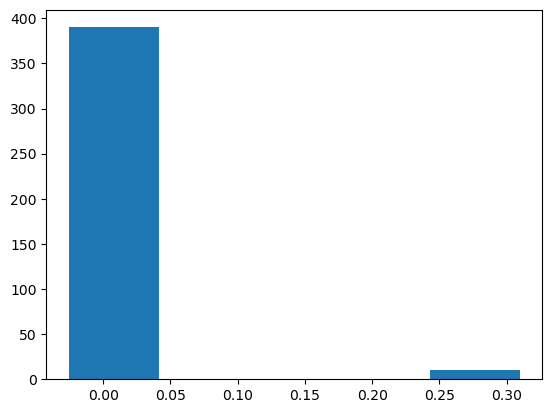

In [ ]:
#| hide
models = build_DSAIR(b=4,
                     c=1,
                     p=np.arange(0, 1, 0.1),
                     s=np.arange(1, 5, 0.1),
                     B=10**4,
                     W=10**2,
                     pfo=0,
                     α=0,
                     γ=0,
                     β=0.01,
                     Z=100,
                     strategy_set=["AS", "AU", "PS"],
                     collective_risk=0)
# This time, we set α and γ as functions of s
models['α'] = 3/4 * models['s']
models['γ'] = 3/4 * models['s']
results = thread_macro(models,
                       payoffs_sr_pfo_extension,
                       threshold_ps_r_d_au)

r = (models['W'] - models['γ']) / (models['s'] - models['γ'])
pr_check = 1 - 1 / (models['s'] + 2 * models['W'] / r)
pr_actual = results['threshold_ps_risk_dominates_au']
residuals = pr_check - pr_actual

plt.hist(residuals, bins=5);

In [ ]:
#| export

@multi
def risk_dominance(models):
    return models.get('risk_dominance_rule')

@method(risk_dominance, "reg-market-v2-p_threshold")
def risk_dominance(models):
    names1 = ['b', 'c', 's', 'p', 'B', 'W']
    names2 = ['pfo_l', 'pfo_h', 'λ', 'r_l', 'r_h', 'g']
    b, c, s, p, B, W = [models[k] for k in names1]
    pfo_l, pfo_h, λ, r_l, r_h, g = [models[k] for k in names2]
    collective_risk = models.get('collective_risk', 0)
    risk_shared = (1 - (1-p)*collective_risk)
    mix = models.get('incentive_mix', 0)
    
    # We can influence the likelihood that the caught firm loses by a careful
    # choice of phi_h and decisiveness.
    
    k = models.get('decisiveness', 100)
    phi_h = models.get('phi_h', 1/s)
    caught_loses_h = ((s * phi_h)**k + 1)**(-1)
    
    # The regulatory market payoffs when regulators are hq are as follows:
    # Π_h11 = B / (2*W) + b/2 - c
    # Π_h12 = ((1 - pfo_h) * b / (s+1) * risk_shared
    #          + pfo_h * caught_loses_h * (b + B / W)
    #          - c)
    # Π_h21 = (p * (1 - pfo_h) * (s*b / (s + 1) + s * B / W)
    #          + pfo_h * (1 - caught_loses_h) * B / W)
    # Π_h22 = (p * (1 - pfo_h**2) * (b/2 + s*B/(2*W)) * risk_shared
    #          + pfo_h**2 * B/(2*W))
    
    # l.h.s terms not scaled by p
    term1 = B / (2*W) + b/2 - c
    term2 = (1 - pfo_h) * b / (s+1)
    term3 = term2 * -1 * collective_risk
    term4 = pfo_h * caught_loses_h * (b + B / W) - c
    
    # l.h.s terms scaled by p
    term5 = term2 * collective_risk
    
    # r.h.s terms not scaled by p
    term6 = pfo_h * (1 - caught_loses_h) * B / W
    term7 = pfo_h**2 * B/(2*W)
    
    # r.h.s terms scaled by p    
    term8 = (1 - pfo_h) * (s*b / (s + 1) + s * B / W)
    term9 = (1 - pfo_h**2) * (b/2 + s*B/(2*W))
    term10 = (1 - pfo_h**2) * (b/2 + s*B/(2*W)) * -1 * collective_risk
    
    # r.h.s terms scaled by p**2
    term11 = (1 - pfo_h**2) * (b/2 + s*B/(2*W)) * collective_risk
    
    # This gives us a quadratic in p if we move everything to r.h.s
    # in the form a x**2 + b x + c = 0
    a = term11
    b = term8 + term9 + term10 - term5
    c = term6 + term7 - term1 - term2 - term3 - term4
    # We can solve for p using the quadratic formula
    threshold_p = np.where(a==0,
                           -c / b,
                           (-b + (b**2 - 4*a*c)**0.5)/(2*a))
    threshold_p_alt = np.where(a==0,
                               -c / b,
                               (-b - (b**2 - 4*a*c)**0.5)/(2*a))
    return {**models, 
            "threshold_as_risk_dominates_au": threshold_p,
            "threshold_as_risk_dominates_au_alt": threshold_p_alt}
    
@method(risk_dominance, "reg-market-v3-p_threshold")
def risk_dominance(models):
    names1 = ['b', 'c', 's', 'p', 'B', 'W']
    names2 = ['pfo_l', 'pfo_h', 'λ', 'r_l', 'r_h', 'g']
    b, c, s, p, B, W = [models[k] for k in names1]
    pfo_l, pfo_h, λ, r_l, r_h, g = [models[k] for k in names2]
    collective_risk = models.get('collective_risk', 0)
    risk_shared = (1 - (1-p)*collective_risk)
    mix = models.get('incentive_mix', 0)
    
    # We can influence the likelihood that the caught firm loses by a careful
    # choice of phi_h and decisiveness.
    
    k = models.get('decisiveness', 100)
    phi_h = models.get('phi_h', 1/s)
    caught_loses_h = ((s * phi_h)**k + 1)**(-1)
    
    # The regulatory market payoffs when regulators are hq are as follows:
    # Notice that one of the terms is missing from Π_h22 in this version.
    # Π_h11 = B / (2*W) + b/2 - c
    # Π_h12 = ((1 - pfo_h) * b / (s+1) * risk_shared
    #          + pfo_h * caught_loses_h * (b + B / W)
    #          - c)
    # Π_h21 = (p * (1 - pfo_h) * (s*b / (s + 1) + s * B / W)
    #          + pfo_h * (1 - caught_loses_h) * B / W)
    # Π_h22 = (p * (1 - pfo_h**2) * (b/2 + s*B/(2*W)) * risk_shared)
    
    # l.h.s terms not scaled by p
    term1 = B / (2*W) + b/2 - c
    term2 = (1 - pfo_h) * b / (s+1)
    term3 = term2 * -1 * collective_risk
    term4 = pfo_h * caught_loses_h * (b + B / W) - c
    
    # l.h.s terms scaled by p
    term5 = term2 * collective_risk
    
    # r.h.s terms not scaled by p
    term6 = pfo_h * (1 - caught_loses_h) * B / W
    term7 = 0  # In v2 of the model, there was a non-zero term here
    
    # r.h.s terms scaled by p    
    term8 = (1 - pfo_h) * (s*b / (s + 1) + s * B / W)
    term9 = (1 - pfo_h**2) * (b/2 + s*B/(2*W))
    term10 = (1 - pfo_h**2) * (b/2 + s*B/(2*W)) * -1 * collective_risk
    
    # r.h.s terms scaled by p**2
    term11 = (1 - pfo_h**2) * (b/2 + s*B/(2*W)) * collective_risk
    
    # This gives us a quadratic in p if we move everything to r.h.s
    # in the form a x**2 + b x + c = 0
    a = term11
    b = term8 + term9 + term10 - term5
    c = term6 + term7 - term1 - term2 - term3 - term4
    # We can solve for p using the quadratic formula
    threshold_p = np.where(a==0,
                           -c / b,
                           (-b + (b**2 - 4*a*c)**0.5)/(2*a))
    threshold_p_alt = np.where(a==0,
                               -c / b,
                               (-b - (b**2 - 4*a*c)**0.5)/(2*a))
    return {**models, 
            "threshold_as_risk_dominates_au": threshold_p,
            "threshold_as_risk_dominates_au_alt": threshold_p_alt}
    
@method(risk_dominance, "reg-market-v4-p_threshold")
def risk_dominance(models):
    names1 = ['b', 'c', 's', 'p', 'B', 'W']
    names2 = ['pfo_l', 'pfo_h', 'λ', 'r_l', 'r_h', 'g']
    b, c, s, p, B, W = [models[k] for k in names1]
    pfo_l, pfo_h, λ, r_l, r_h, g = [models[k] for k in names2]
    collective_risk = models.get('collective_risk', 0)
    risk_shared = (1 - (1-p)*collective_risk)
    mix = models.get('incentive_mix', 0)
    
    # We can influence the likelihood that the caught firm loses by a careful
    # choice of phi_h and decisiveness.
    
    k = models.get('decisiveness', 100)
    phi_h = models.get('phi_h', 1/s)
    phi2_h = models.get('phi2_h', 1/s)
    caught_loses_h = ((s * phi_h)**k + 1)**(-1)
    both_caught_lose_h = ((s * phi2_h)**k + 1)**(-1)
    
    # The regulatory market payoffs when regulators are hq are as follows:
    # Π_h11 = B / (2*W) + b/2 - c
    # Π_h12 = ((1 - pfo_h) * b / (s+1) * risk_shared
    #          + pfo_h * caught_loses_h * (b + B / W)
    #          - c)
    # Π_h21 = (p * (1 - pfo_h) * (s*b / (s + 1) + s * B / W)
    #          + pfo_h * (1 - caught_loses_h) * B / W)
    # Π_h22 = (p * (1 - pfo_h**2) * (b/2 + s*B/(2*W)) * risk_shared
    #          + pfo_h**2 * both_caught_lose_h * B/(2*W))
    
    
    # l.h.s terms not scaled by p
    term1 = B / (2*W) + b/2 - c
    term2 = (1 - pfo_h) * b / (s+1)
    term3 = term2 * -1 * collective_risk
    term4 = pfo_h * caught_loses_h * (b + B / W) - c
    
    # l.h.s terms scaled by p
    term5 = term2 * collective_risk
    
    # r.h.s terms not scaled by p
    term6 = pfo_h * (1 - caught_loses_h) * B / W
    term7 = pfo_h**2 * both_caught_lose_h * B/(2*W)
    
    # r.h.s terms scaled by p    
    term8 = (1 - pfo_h) * (s*b / (s + 1) + s * B / W)
    term9 = (1 - pfo_h**2) * (b/2 + s*B/(2*W))
    term10 = (1 - pfo_h**2) * (b/2 + s*B/(2*W)) * -1 * collective_risk
    
    # r.h.s terms scaled by p**2
    term11 = (1 - pfo_h**2) * (b/2 + s*B/(2*W)) * collective_risk
    
    # This gives us a quadratic in p if we move everything to r.h.s
    # in the form a x**2 + b x + c = 0
    a = term11
    b = term8 + term9 + term10 - term5
    c = term6 + term7 - term1 - term2 - term3 - term4
    # We can solve for p using the quadratic formula
    threshold_p = np.where(a==0,
                           -c / b,
                           (-b + (b**2 - 4*a*c)**0.5)/(2*a))
    threshold_p_alt = np.where(a==0,
                               -c / b,
                               (-b - (b**2 - 4*a*c)**0.5)/(2*a))
    return {**models, 
            "threshold_as_risk_dominates_au": threshold_p,
            "threshold_as_risk_dominates_au_alt": threshold_p_alt}
    

@method(risk_dominance, "reg-market-v5-p_threshold")
def risk_dominance(models):
    names1 = ['b', 'c', 's', 'p', 'B', 'W']
    names2 = ['pfo_l', 'pfo_h', 'λ', 'r_l', 'r_h', 'g']
    b, c, s, p, B, W = [models[k] for k in names1]
    pfo_l, pfo_h, λ, r_l, r_h, g = [models[k] for k in names2]
    collective_risk = models.get('collective_risk', 0)
    risk_shared = (1 - (1-p)*collective_risk)
    mix = models.get('incentive_mix', 0)
    
    # We can influence the likelihood that the caught firm loses by a careful
    # choice of phi_h and decisiveness.
    
    k = models.get('decisiveness', 100)
    phi_h = models.get('phi_h', 1/s)
    phi2_h = models.get('phi2_h', 1/s)
    caught_loses_h = ((s * phi_h)**k + 1)**(-1)
    both_caught_fail_h = ((s * phi2_h)**k + 1)**(-1)
    
    # The regulatory market payoffs when regulators are hq are as follows:
    # Π_h11 = B / (2*W) + b/2 - c
    # Π_h12 = ((1 - pfo_h) * b / (s+1) * risk_shared
    #          + pfo_h * caught_loses_h * (b + B / W)
    #          - c)
    # Π_h21 = (p * (1 - pfo_h) * (s*b / (s + 1) + s * B / W)
    #          + pfo_h * (1 - caught_loses_h) * B / W)
    # Π_h22 = (p * (1 - pfo_h**2) * (b/2 + s*B/(2*W)) * risk_shared
    #          + pfo_h**2 * (1 - both_caught_fail_h) * B/(2*W))
    
    
    # l.h.s terms not scaled by p
    term1 = B / (2*W) + b/2 - c
    term2 = (1 - pfo_h) * b / (s+1)
    term3 = term2 * -1 * collective_risk
    term4 = pfo_h * caught_loses_h * (b + B / W) - c
    
    # l.h.s terms scaled by p
    term5 = term2 * collective_risk
    
    # r.h.s terms not scaled by p
    term6 = pfo_h * (1 - caught_loses_h) * B / W
    term7 = pfo_h**2 * (1 - both_caught_fail_h) * B/(2*W)
    
    # r.h.s terms scaled by p    
    term8 = (1 - pfo_h) * (s*b / (s + 1) + s * B / W)
    term9 = (1 - pfo_h**2) * (b/2 + s*B/(2*W))
    term10 = (1 - pfo_h**2) * (b/2 + s*B/(2*W)) * -1 * collective_risk
    
    # r.h.s terms scaled by p**2
    term11 = (1 - pfo_h**2) * (b/2 + s*B/(2*W)) * collective_risk
    
    # This gives us a quadratic in p if we move everything to r.h.s
    # in the form a x**2 + b x + c = 0
    a = term11
    b = term8 + term9 + term10 - term5
    c = term6 + term7 - term1 - term2 - term3 - term4
    # We can solve for p using the quadratic formula
    threshold_p = np.where(a==0,
                           -c / b,
                           (-b + (b**2 - 4*a*c)**0.5)/(2*a))
    threshold_p_alt = np.where(a==0,
                               -c / b,
                               (-b - (b**2 - 4*a*c)**0.5)/(2*a))
    return {**models, 
            "threshold_as_risk_dominates_au": threshold_p,
            "threshold_as_risk_dominates_au_alt": threshold_p_alt}
    
@method(risk_dominance, "reg-market-v6-p_threshold")
def risk_dominance(models):
    names1 = ['b', 'c', 's', 'p', 'B', 'W']
    names2 = ['pfo_l', 'pfo_h', 'λ', 'r_l', 'r_h', 'g']
    b, c, s, p, B, W = [models[k] for k in names1]
    pfo_l, pfo_h, λ, r_l, r_h, g = [models[k] for k in names2]
    collective_risk = models.get('collective_risk', 0)
    risk_shared = (1 - (1-p)*collective_risk)
    mix = models.get('incentive_mix', 0)
    
    # We can influence the likelihood that the caught firm loses by a careful
    # choice of phi_h and decisiveness.
    

    k = models.get('decisiveness', 100)
    # Win impact of regulators when they catch 1 or 2 safety violators
    phi_h = models.get('phi_h', 1/s)
    phi2_h = models.get('phi2_h,', 1/s)
    # Speed impact of regulators when they catch 1 or 2 safety violators
    theta_h = models.get('theta_h', 1/s)
    theta2_h = models.get('theta2_h,', 1/s)
    # Risk impact of regulators when they catch 1 or 2 safety violators
    gamma_h = models.get('gamma_h', phi_h)
    gamma2_h = models.get('gamma2_h', phi2_h)
    # Tullock contest to determine which firm wins after
    # one safety violator is caught
    caught_loses_h = ((s * phi_h)**k + 1)**(-1)
    # Tullock contest to determine whether any firm wins if they are both
    # safety violators who were caught by the regulator
    both_caught_fail_h = (2 * (s * phi2_h)**k + 1)**(-1)
    risk_shared_reg = (1 - (1-p)*collective_risk * gamma_h)
    risk_shared_reg2 = (1 - (1-p)*collective_risk * gamma2_h)
    
    
    # The regulatory market payoffs when regulators are hq are as follows:
    # Π_h11 = B / (2*W) + b/2 - c
    # Π_h12 = ((1 - pfo_h) * b / (s+1) * risk_shared
    #          + pfo_h * caught_loses_h * (b + B / W)
    #          - c)
    # Π_h21 = (p * (1 - pfo_h) * (s*b / (s + 1) + s * B / W)
    #          + ((1 - (1 - p) * gamma_h)
    #             * pfo_h * (1 - caught_loses_h)
    #             * theta_h * s
    #             * B / W))
    # Π_h22 = (p * (1 - pfo_h**2) * (b/2 + s*B/(2*W)) * risk_shared
    #          + ((1 - (1 - p) * gamma2_h) * risk_shared_reg2
    #             * pfo_h**2 * (1 - both_caught_fail_h)
    #             * theta2_h * s
    #             * B/(2*W)))
    
    # Note that:
    # (1 - (1 - p) * gamma2_h) * risk_shared_reg2
    # = (1 - (1 + collective_risk) * (1 - p) * gamma2_h + collective_risk * (1-p)**2 * gamma2_h**2)
    
    # l.h.s terms not scaled by p
    term1 = B / (2*W) + b/2 - c
    term2 = (1 - pfo_h) * b / (s+1)
    term3 = term2 * -1 * collective_risk
    term4 = pfo_h * caught_loses_h * (b + B / W) - c
    
    # l.h.s terms scaled by p
    term5 = term2 * collective_risk
    
    # r.h.s terms not scaled by p
    term6 = pfo_h * (1 - caught_loses_h) * theta_h * s * B / W
    term7 = -gamma_h * term6
    term8 = pfo_h**2 * (1 - both_caught_fail_h) * theta2_h * s * B/(2*W)
    term9 = term8 * -1 * (1 + collective_risk) * gamma2_h
    term10 = term8 * collective_risk * gamma2_h**2
    
    # r.h.s terms scaled by p
    term11 = (1 - pfo_h) * (s*b / (s + 1) + s * B / W)
    term12 = gamma_h * term6
    term13 = (1 - pfo_h**2) * (b/2 + s*B/(2*W))
    term14 = (1 - pfo_h**2) * (b/2 + s*B/(2*W)) * -1 * collective_risk
    term15 = term8 * (1 + collective_risk) * gamma2_h
    term16 = term8 * -1 * 2 * collective_risk * gamma2_h**2
    
    
    # r.h.s terms scaled by p**2
    term17 = (1 - pfo_h**2) * (b/2 + s*B/(2*W)) * collective_risk
    term18 = term8 * collective_risk * gamma2_h**2
    
    # This gives us a quadratic in p if we move everything to r.h.s
    # in the form a x**2 + b x + c = 0
    a = term17 + term18
    b = term11 + term12 + term13 + term14 + term15 + term16 - term5
    c = term6 + term7 + term8 + term9 + term10 - term1 - term2 - term3 - term4 
    # We can solve for p using the quadratic formula
    threshold_p = np.where(a==0,
                           -c / b,
                           (-b + (b**2 - 4*a*c)**0.5)/(2*a))
    threshold_p_alt = np.where(a==0,
                               -c / b,
                               (-b - (b**2 - 4*a*c)**0.5)/(2*a))
    return {**models, 
            "threshold_as_risk_dominates_au": threshold_p,
            "threshold_as_risk_dominates_au_alt": threshold_p_alt}

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()